In [39]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_palette('husl')


class DataProcessing:
    
    @staticmethod
    def ShuffleData(X):
        for i in range(len(X)-1, 0, -1):
            tmp = random.randint(0, i+1)
            X.iloc[i], X.iloc[tmp] = X.iloc[tmp], X.iloc[i]
            
        return X
    
    @staticmethod
    def NormalizeData(X):
        df = X.copy()
        for column in df.columns[:-1]:
            #normalizacja z wykorzystaniem metody min-max
            max = df[column].max()
            min = df[column].min()
            df[column] = (df[column] - min) / (max - min)

        df.reset_index(drop=True, inplace=True)

        return df
    
    
    @staticmethod
    def SplitData(X, x, y): # x, y - proporcja dzielenia zbiorow: x + y = 100
        df = X.copy()
        
        rate = x/100
        numberOfRows = newSet.shape[0]
        splitRatio1 = int(numberOfRows * rate) - 1
        X_test = df.loc[0:splitRatio1]
        X_validation = df.loc[splitRatio1+1:numberOfRows-1]

        return X_test, X_validation

In [52]:
fetals = pd.read_csv('fetal_health.csv')

<AxesSubplot:xlabel='severe_decelerations', ylabel='fetal_health'>

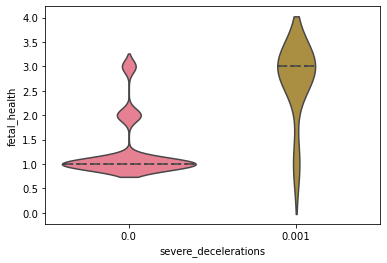

In [53]:
sns.violinplot(y='fetal_health',x='severe_decelerations', data=fetals, inner='quartile')

In [54]:
fetals = fetals.drop('severe_decelerations', axis=1) # below explanation why

In [55]:
# Fetal health: 1 - Normal 2 - Suspect 3 - Pathological
fetals.head()
fetals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   prolongued_decelerations                                2126 non-null   float64
 6   abnormal_short_term_variability                         2126 non-null   float64
 7   mean_value_of_short_term_variability                    2126 non-null   float64
 8   percentage_of_time_with_abnormal_long_

In [50]:
shuffledSet = DataProcessing.ShuffleData(fetals)
newSet = DataProcessing.NormalizeData(shuffledSet)

newSet.head() #normalized set
shuffledset = DataProcessing.ShuffleData(newSet)
fetalstrain, fetalsvalid = DataProcessing.SplitData(shuffledset, 70, 30)
fetalstrain.head(2126)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,0.264151,0.000000,0.000000,0.000000,0.0,0.0,0.813333,0.044118,0.472527,0.047337,...,0.110092,0.051282,0.1250,0.0,0.422414,0.464286,0.315789,0.339535,1.0,2.0
1,0.490566,0.315789,0.000000,0.461538,0.2,0.0,0.066667,0.279412,0.000000,0.205128,...,0.165138,0.974359,0.3750,0.1,0.603448,0.452381,0.515789,0.055814,0.5,1.0
2,0.490566,0.315789,0.000000,0.461538,0.2,0.0,0.066667,0.279412,0.000000,0.205128,...,0.165138,0.974359,0.3750,0.1,0.603448,0.452381,0.515789,0.055814,0.5,1.0
3,0.509434,0.157895,0.000000,0.615385,0.2,0.0,0.053333,0.279412,0.000000,0.264300,...,0.165138,0.974359,0.3125,0.1,0.603448,0.440476,0.494737,0.060465,0.5,1.0
4,0.509434,0.157895,0.000000,0.615385,0.2,0.0,0.053333,0.279412,0.000000,0.264300,...,0.165138,0.974359,0.3125,0.1,0.603448,0.440476,0.494737,0.060465,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,0.641509,0.000000,0.012579,0.000000,0.2,0.0,0.733333,0.029412,0.274725,0.140039,...,0.660550,0.320513,0.0625,0.0,0.612069,0.476190,0.526316,0.018605,1.0,2.0
1484,1.000000,0.105263,0.000000,0.692308,0.0,0.0,0.613333,0.044118,0.142857,0.157791,...,0.880734,0.846154,0.1250,0.0,0.827586,0.880952,0.873684,0.037209,0.5,2.0
1485,0.754717,0.000000,0.012579,0.000000,0.0,0.0,0.866667,0.014706,0.670330,0.112426,...,0.642202,0.346154,0.2500,0.0,0.655172,0.571429,0.589474,0.000000,1.0,2.0
1486,0.792453,0.000000,0.006289,0.000000,0.0,0.0,0.773333,0.014706,0.758242,0.100592,...,0.788991,0.410256,0.1875,0.0,0.681034,0.595238,0.621053,0.000000,1.0,3.0


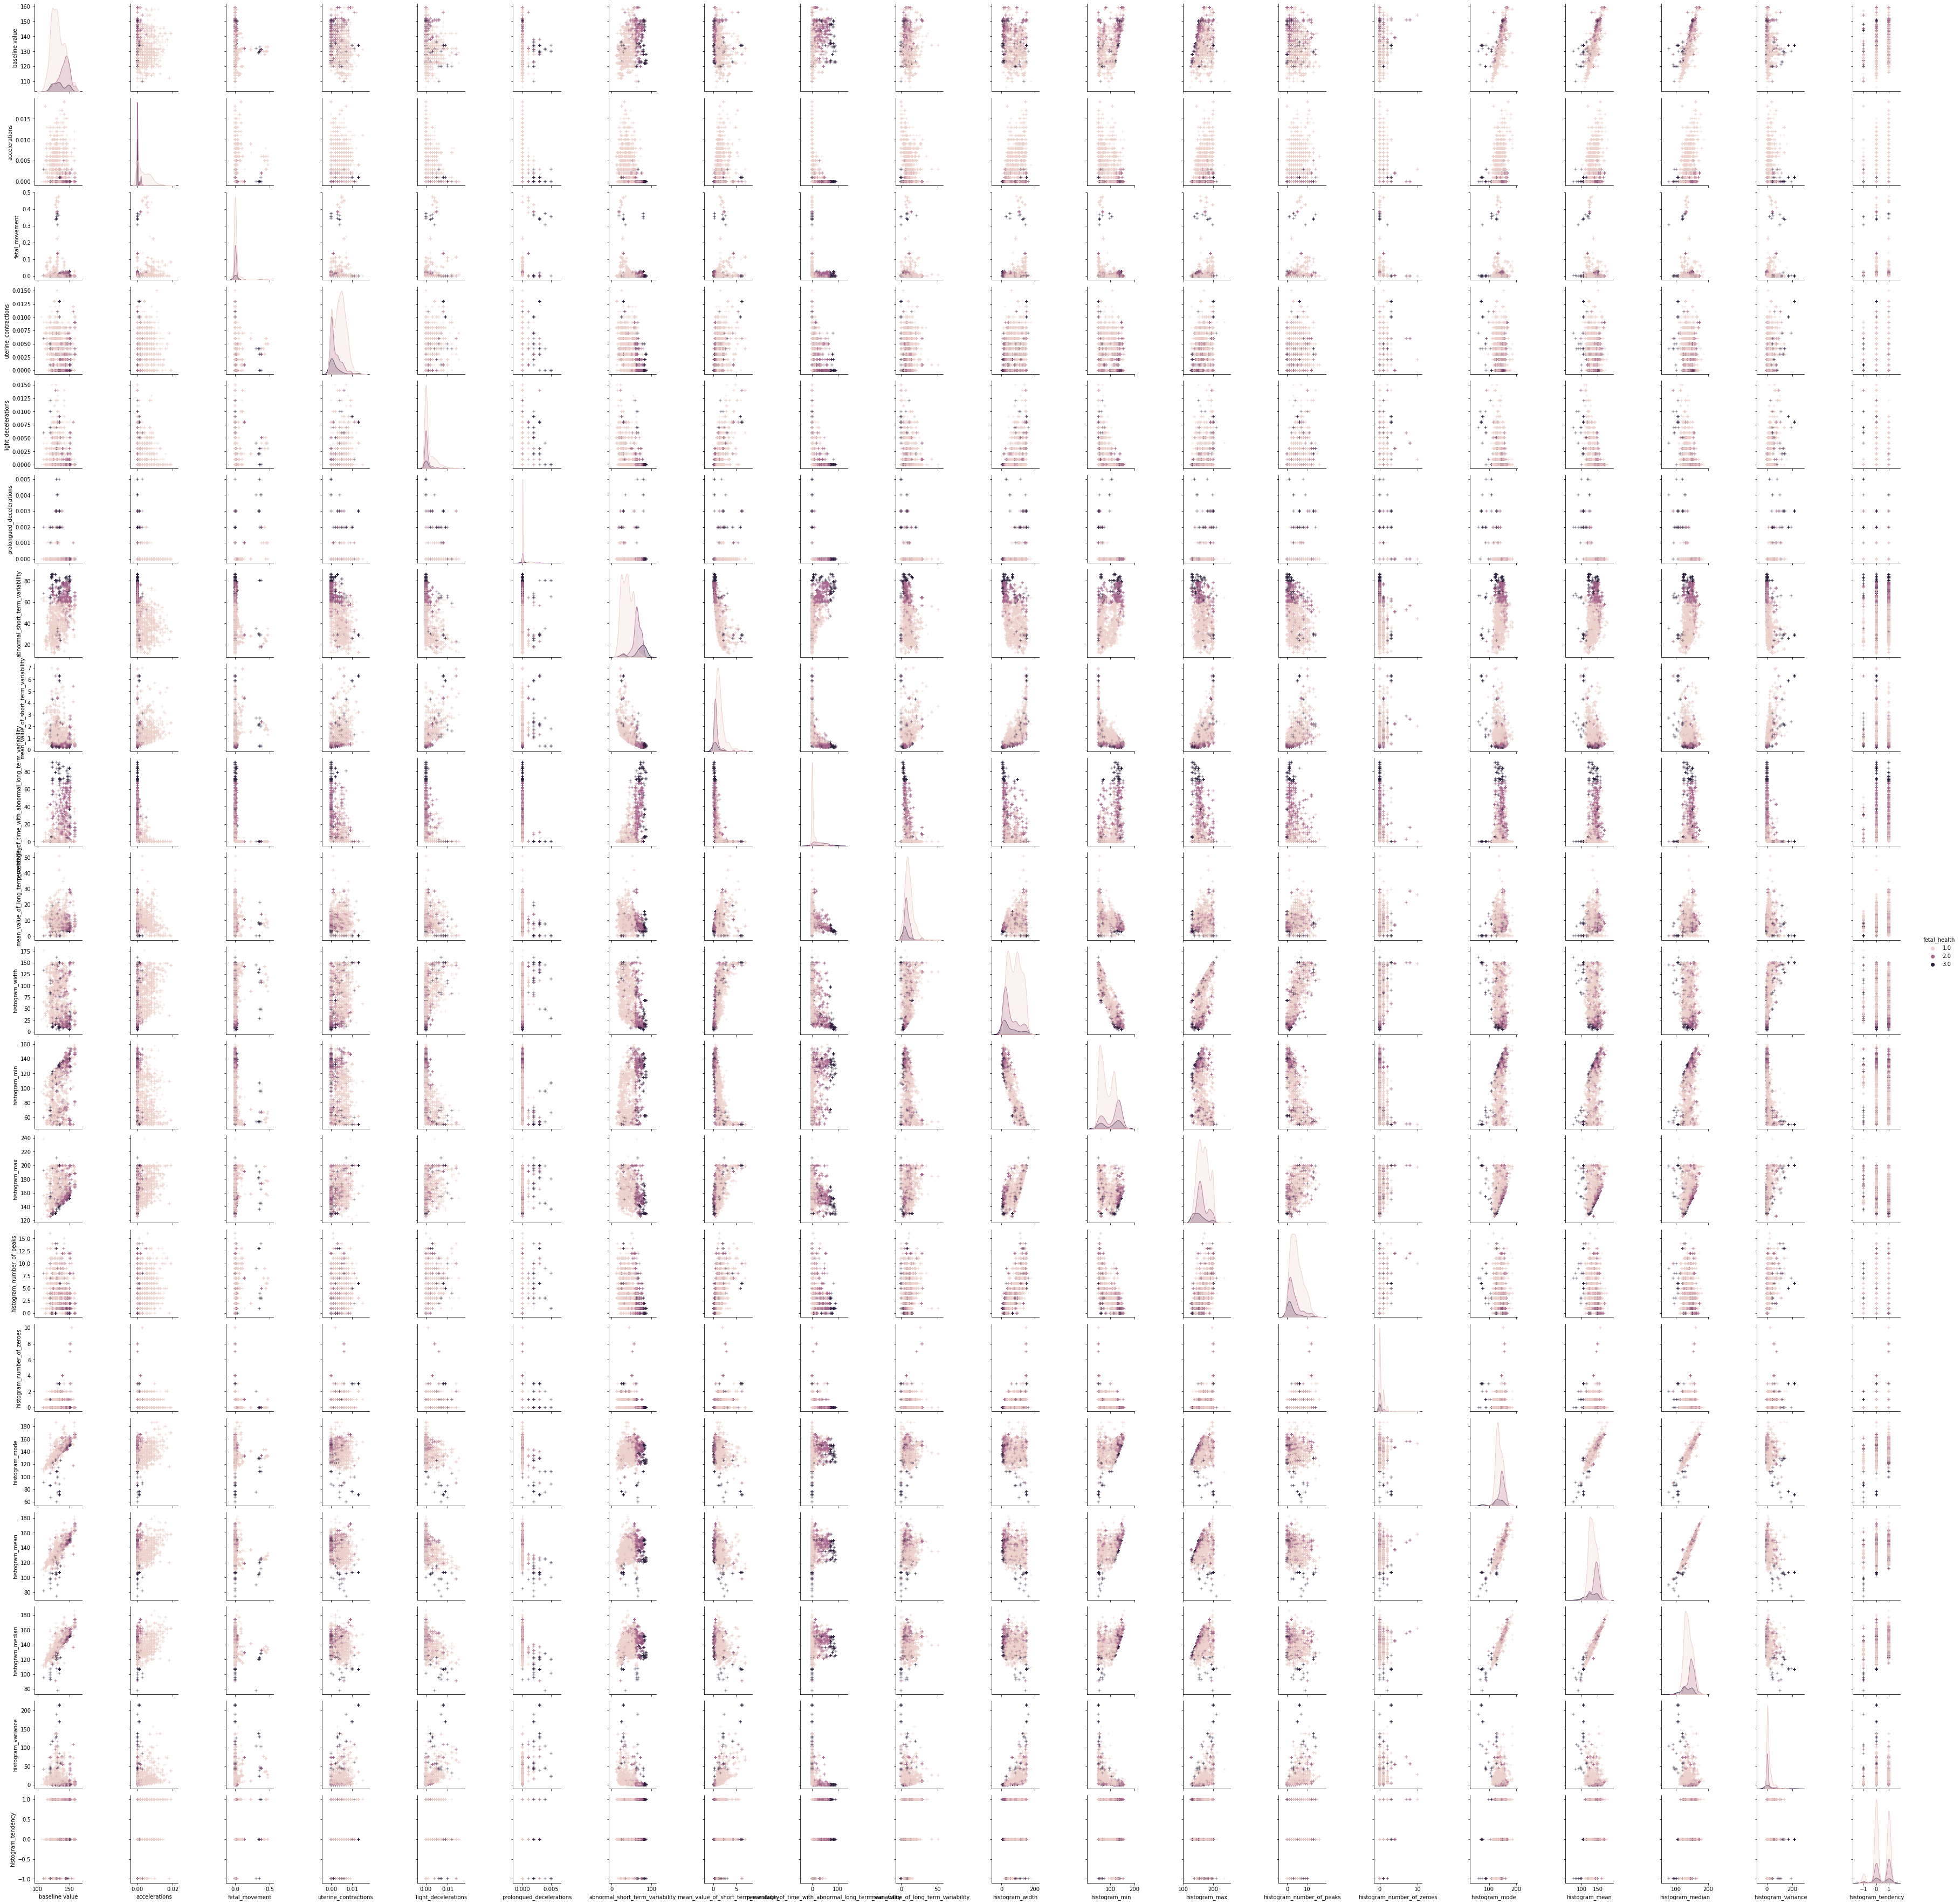

In [44]:
sns.pairplot(fetals, hue='fetal_health', markers='+') #it was maked with severe_decelaration included

In [46]:
# after 1 week of hard analyzing of this graphs, we decided to remove severe_deceleration from dataset,
# because it is useless fo

#normalized set would need much more effort to be usable for bayes
#not normalized set:
# shuffledset = DataProcessing.ShuffleData(fetals)
# fetalstrain, fetalsvalid = DataProcessing.SplitData(shuffledset, 70, 30)
# fetalstrain.head(2126)

In [47]:
class NaiveBayes:
    #srednia
    @staticmethod
    def mean(atr):
        return sum(atr)/len(atr)
    
    #odchylenie standardowe
    def std(attr):
        mean = NaiveBayes.mean(attr)
        sumelem = 0
        for i in attr:
            sumelem += (i-mean)**2
        return math.sqrt(sumelem/len(attr))

    #funkcja guassa
    @staticmethod
    def gauss(x,mean,std):
        if(std == 0):
            std = 0.00000000000000001 #dziala XD
        exponent = np.exp(-(x-mean)**2/(2*std**2))
        return 1/(np.sqrt(2*np.pi*std**2))*exponent
    
    @staticmethod
    def classify(X, sample):
        #seperacja na klasy
        result = {}
        
        for name in fetalstrain['fetal_health'].unique():
            a = fetalstrain.loc[fetalstrain['fetal_health'] == name]
            a.pop('fetal_health')
            gauss_result = 1
            for key,values in a.iteritems():
                average = NaiveBayes.mean(a[key])
                std = NaiveBayes.std(a[key])
                gauss_result*=NaiveBayes.gauss(sample[key], average, std)
            result[name]=gauss_result

        return max(result, key=result.get)

In [51]:
match = 0

for i in range(0,len(fetalsvalid)):
    sample = fetalsvalid.loc[i+len(fetalstrain)]
    if float(sample['fetal_health']) == NaiveBayes.classify(fetalstrain,sample):
        match+=1

print("Accurancy: ", match/len(fetalsvalid)*100, "%")

Accurancy:  80.09404388714734 %
